<img src="The-Northcap-University-NCU-logo.png">

# Deep Learning for Image Classification Drill


Welcome to your drill! Follow the instructions in bold below to complete the drill.

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

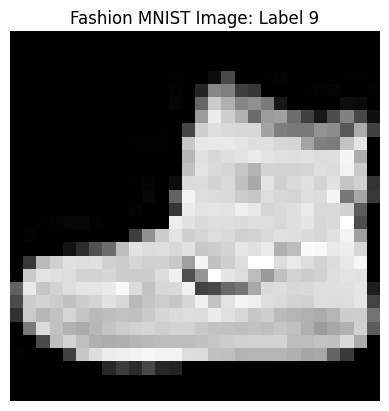

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset from TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Choose an image index to display
image_index = 0  # You can change this index to view different images

# Display the selected image
plt.imshow(train_images[image_index], cmap='gray')  # cmap='gray' for grayscale
plt.title(f'Fashion MNIST Image: Label {train_labels[image_index]}')
plt.axis('off')
plt.show()


170498071/170498071 [==============================] - 7s 0us/step


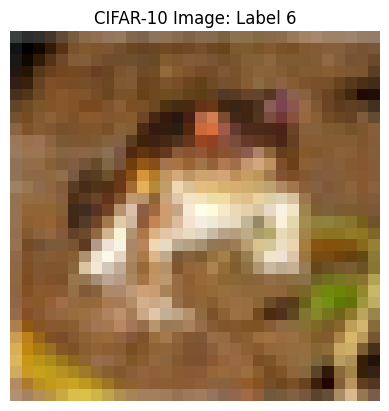

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset from TensorFlow
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Choose an image index to display
image_index = 0  # You can change this index to view different images

# Display the selected image
plt.imshow(train_images[image_index])
plt.title(f'CIFAR-10 Image: Label {train_labels[image_index][0]}')
plt.axis('off')
plt.show()


## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

255

In [8]:
import tensorflow as tf

# Load the CIFAR-10 dataset from TensorFlow
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the pixel values by dividing by the maximum value
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

# Displaying the shape of the normalized datasets to confirm the change
print("Shape of normalized training images:", train_images_normalized.shape)
print("Shape of normalized testing images:", test_images_normalized.shape)


Shape of normalized training images: (50000, 32, 32, 3)
Shape of normalized testing images: (10000, 32, 32, 3)


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
import tensorflow as tf

# Load the CIFAR-10 dataset from TensorFlow
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the pixel values by dividing by the maximum value
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

# Reshape the arrays to include a 4th dimension representing a single channel
train_images_reshaped = train_images_normalized.reshape(train_images_normalized.shape[0], train_images_normalized.shape[1], train_images_normalized.shape[2], 3)
test_images_reshaped = test_images_normalized.reshape(test_images_normalized.shape[0], test_images_normalized.shape[1], test_images_normalized.shape[2], 3)

# Displaying the shape of the reshaped datasets to confirm the change
print("Shape of reshaped training images:", train_images_reshaped.shape)
print("Shape of reshaped testing images:", test_images_reshaped.shape)


Shape of reshaped training images: (50000, 32, 32, 3)
Shape of reshaped testing images: (10000, 32, 32, 3)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [10]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset from TensorFlow
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the pixel values by dividing by the maximum value
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

# Reshape the arrays to include a 4th dimension representing a single channel
train_images_reshaped = train_images_normalized.reshape(train_images_normalized.shape[0], train_images_normalized.shape[1], train_images_normalized.shape[2], 3)
test_images_reshaped = test_images_normalized.reshape(test_images_normalized.shape[0], test_images_normalized.shape[1], test_images_normalized.shape[2], 3)

# Convert the integer labels to one-hot encoded vectors
num_classes = 10  # CIFAR-10 has 10 classes
train_labels_one_hot = to_categorical(train_labels, num_classes)
test_labels_one_hot = to_categorical(test_labels, num_classes)

# Displaying the shape of the one-hot encoded label arrays to confirm the change
print("Shape of one-hot encoded training labels:", train_labels_one_hot.shape)
print("Shape of one-hot encoded testing labels:", test_labels_one_hot.shape)


Shape of one-hot encoded training labels: (50000, 10)
Shape of one-hot encoded testing labels: (10000, 10)


## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential()

# Add a 2D Convolutional Layer
model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(32, 32, 3)))

# Add a Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a Dense Layer
model.add(Dense(128, activation='relu'))

# Add the final Dense Layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 805802 (3.07 MB)
Trainable params: 805802 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

Epoch 1/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5457 - accuracy: 0.4465 - val_loss: 1.3829 - val_accuracy: 0.5116
Epoch 2/10
1250/1250 [==============================] - 43s 34ms/step - loss: 1.2242 - accuracy: 0.5742 - val_loss: 1.2380 - val_accuracy: 0.5735
Epoch 3/10
1250/1250 [==============================] - 38s 31ms/step - loss: 1.0881 - accuracy: 0.6215 - val_loss: 1.1639 - val_accuracy: 0.6028
Epoch 4/10
1250/1250 [==============================] - 37s 30ms/step - loss: 0.9816 - accuracy: 0.6611 - val_loss: 1.0780 - val_accuracy: 0.6347
Epoch 5/10
1250/1250 [==============================] - 36s 29ms/step - loss: 0.8858 - accuracy: 0.6951 - val_loss: 1.1304 - val_accuracy: 0.6262
Epoch 6/10
1250/1250 [==============================] - 38s 30ms/step - loss: 0.7978 - accuracy: 0.7245 - val_loss: 1.1543 - val_accuracy: 0.6323
Epoch 7/10
1250/1250 [==============================] - 38s 30ms/step - loss: 0.7137 - accuracy: 0.7557 - val_loss: 1.1354 -

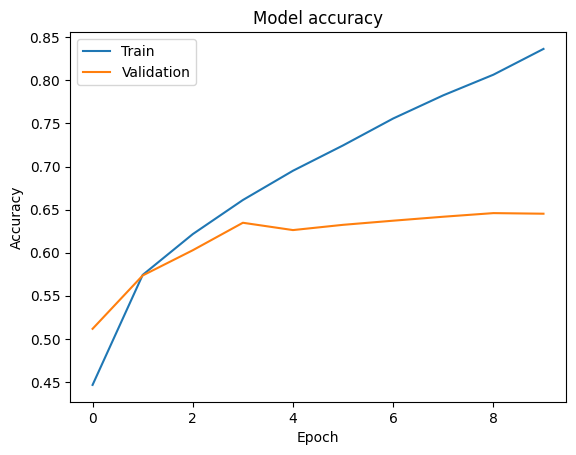

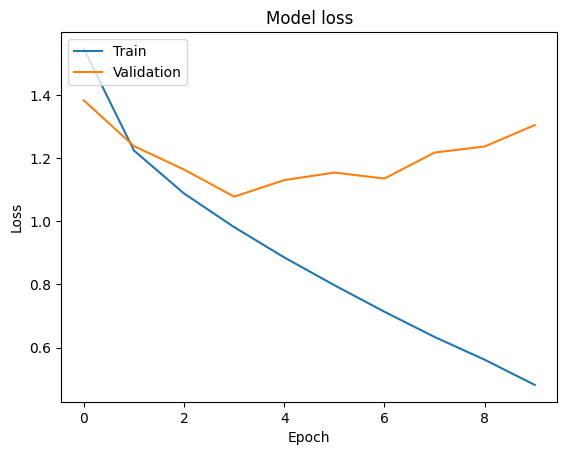

In [13]:
# Train the model
history = model.fit(train_images_reshaped, train_labels_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [14]:
import numpy as np
from sklearn.metrics import classification_report

# Use the trained model to make predictions on the test set
predictions = model.predict(test_images_reshaped)

# Convert the predicted labels and true labels to categorical format
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels_one_hot, axis=1)

# Calculate accuracy, precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels)
print(report)


313/313 [==============================] - 6s 17ms/step
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1000
           1       0.77      0.70      0.73      1000
           2       0.55      0.48      0.51      1000
           3       0.46      0.45      0.45      1000
           4       0.52      0.68      0.59      1000
           5       0.56      0.47      0.52      1000
           6       0.75      0.68      0.71      1000
           7       0.71      0.68      0.70      1000
           8       0.76      0.78      0.77      1000
           9       0.64      0.80      0.71      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Great Job!